# **Neural Network**
Imagine that you work for SL, and that one of your customers' biggest complaints is that they don't know what's the arrival delay for their buses. You decide to do something about it by building a model to predict the arrival delay at one bus stop. You intend to use the massive amounts of delay data the company has collected over the years to build a machine-learning model.

Lucas model!

# **Develop the neural network model for the bus arrival time delay prediction.​**


## Load and prepare data

In [1269]:
import pandas as pd

# Define the URL from which to fetch the CSV data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
df = pd.read_csv(url)
# Display the first 10 rows of the DataFrame 'df'.
df.head(5)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:06,10261,44417,3,69,0,82,33,99.925373
1,01/05/2022 07:20,10261,45544,3,35,0,82,52,100.191176
2,01/05/2022 07:35,10261,44410,3,7,0,82,10,99.681159
3,01/05/2022 07:51,10261,41724,3,74,15,82,27,99.385714
4,01/05/2022 20:16,10261,45544,3,-3,0,109,17,116.298507


In [1270]:
df.tail()

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
4957,30/05/2022 22:02,10261,41734,4,32,0,120,28,161.900000
4958,31/05/2022 21:32,10261,41375,4,16,0,120,6,157.607692
4959,31/05/2022 21:43,10261,41373,4,69,0,120,59,157.396947
4960,31/05/2022 21:53,10261,41367,4,74,0,120,87,157.189394
4961,31/05/2022 22:05,10261,45540,4,225,0,120,169,161.714286


In [1271]:
df.shape

(4962, 9)

In [1272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           4962 non-null   object 
 1   Stop_id                4962 non-null   int64  
 2   Bus_id                 4962 non-null   int64  
 3   Line_id                4962 non-null   int64  
 4   Arrival_delay          4962 non-null   int64  
 5   Dwell_time             4962 non-null   int64  
 6   Scheduled_travel_time  4962 non-null   int64  
 7   Upstream_stop_delay    4962 non-null   int64  
 8   Recurrent_delay        4962 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 349.0+ KB


In [1273]:
df = df.iloc[:1000]

Remove columns that are no longer needed.

In [1274]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

Create x and y axis

In [1275]:
# Create a DataFrame 'x' containing all columns except 'Arrival_delay'.
x = df.drop(['Arrival_delay'], axis=1)
#x består av Dwell_time, Scheduled travel time, upstream stop delay, recurrent delay

# Create a Series 'y' containing only the 'Arrival_delay' column.
y = df['Arrival_delay']

# Create a neural network model
Now it's time build a neural network and train it with the data prepared in the previous exercise. We'll try neural network first and use cross-validation its meaasure accuracy.

###Function that constructs a model


Two hidden layers with 64 neurons seems to be the best size

In [1288]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

def construct_network_model():
  # Create a Sequential model, which is a linear stack of layers.
  model = Sequential()

  # You will rarely if ever use anything other than relu in the hidden layers (Applied machine learning and AI for engineers, Jeff Prosise)
  # Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
  #model.add(Dense(64, activation='relu', input_dim=4))

  # # Add a Dropout layer with a dropout rate of 0.5.
  model.add(Dropout(0.1))

  # Add another Dense layer with 64 units and ReLU activation.
  model.add(Dense(64, activation='relu'))
  # # Add another Dropout layer with a dropout rate of 0.5.
  #model.add(Dropout(0.1))

  # Add a final Dense layer with 1 unit (typically used for regression tasks).
  model.add(Dense(1))
  return model



Make the model

In [1289]:
model=construct_network_model()
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training. Could also use MSE
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Display a summary of the model architecture, including the number of parameters.
model.summary()

Model: "sequential_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_228 (Dropout)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_480 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_481 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training and prediction
Split dataset

In [1290]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets, with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Train model without callback function

In [1291]:
# Fit the model to the training data, specifying validation split, epochs, and batch size.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)



Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 62.5274 - mae: 62.5274 - val_loss: 43.7183 - val_mae: 43.7183
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.3592 - mae: 48.3592 - val_loss: 39.0704 - val_mae: 39.0704
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.7187 - mae: 43.7187 - val_loss: 35.4458 - val_mae: 35.4458
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.7915 - mae: 39.7915 - val_loss: 33.0612 - val_mae: 33.0612
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.8798 - mae: 38.8798 - val_loss: 32.0508 - val_mae: 32.0508
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.2829 - mae: 32.2829 - val_loss: 32.4531 - val_mae: 32.4531
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.6361 - mae: 35.6361 - val_loss: 32.2043 - val_mae: 32.2043
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.2536 - mae: 33.2536 - val_loss: 31.4726 - val_mae: 31.4726
Epoch 9/200
20/20 ━━━━━━━━━━━━━

Train model with callback function. If you don't want the callback function, don't run this code!

In [1291]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=10, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5.keras"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save thhe model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

Model evaulation by visualisation

[]

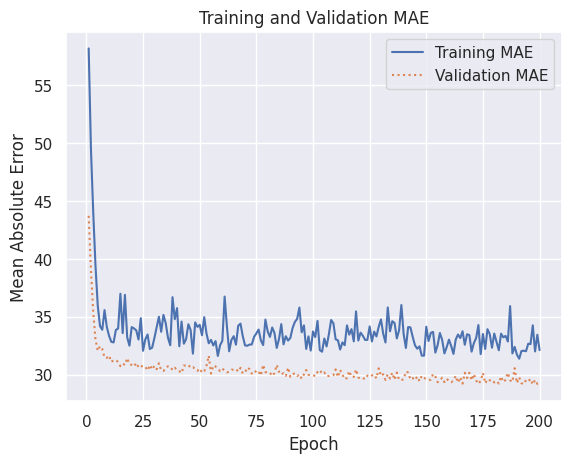

In [1292]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots using Seaborn.
sns.set()
# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']
# Define the number of epochs. = number of iterations to train the network
epochs = range(1, len(err) + 1)
# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

## Evaluate the model
You can evaluate the model's performance using various metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R2).

In [1293]:
# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

from tensorflow.keras.models import load_model

if not filepath =="":
  # Load a pre-trained model from the specified file path.
  model = load_model(filepath)
  print('loading model')
  # Use the loaded model to predict on the test data.
  y_pred = model.predict(X_test)
else:
  print('not loading model')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
loading model
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [1294]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE) between the true and predicted values.
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE) between the true and predicted values.
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R2) score, a measure of how well the model explains the variance in the data.
r2 = r2_score(y_test, y_pred)
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 28.618714325297624
Mean Squared Error: 1449.6597395085637
R-squared: 0.8771265745162964
